Имеется клиенская база с данными о покупках разных товаров собственного производства компании. Хотим сегментировать базу, чтобы формировать для клиента уникальное торговое предложение. На сколько кластеров будем делать базу, не знаем. Результат должен отвечать на вопрос "Какие они, наши клиенты из этого сегмента?'.

 Признаки для сегментирования базы будем использовать количественные и качественные. Количественные - сумма всех покупок, кво всех заказов, кво купленных товаров. Качественные - товарное направлениеб то есть товар который выкуплен клиентом в максимальном количестве относительно других его покупок, и регион местонахождения клиента.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

data_file = pd.read_csv('data_ESMART.csv')
data_file = pd.DataFrame(data_file, columns = ['наименование клиента',\
                                                  'количество всех товаров',\
                                                  'количество заказов',\
                                                  'сумма всех покупок',\
                                                  'товарное направление',\
                                                  'регион по индексу'])
data_file


,наименование клиента,количество всех товаров,количество заказов,сумма всех покупок,товарное направление,регион по индексу
0,ООО «Клиника «Эхинацея»,10,1,13423,Token,Москва
1,Акционерное общество «Пи Джи групп»,10,1,12600,Other,Москва
2,"АНО ""НАЦИОНАЛЬНОЕ ФИТНЕС СОЕДИНЕНИЕ""",2,1,21600,Reader,Регион не определен
3,АНО «ДЮСШ «Нагорная»,5000,1,220000,Other,Москва
4,"АО ""ВЕЛЕДНИКОВО""",50,1,9867,Other,Московская область
...,...,...,...,...,...,...
337,"ООО ""Компания Луис+""",2221,13,2791863,Other,Москва
338,"ООО ""ТД ТИНКО""",575,13,171311,Other,Москва
339,ИП Маринич Юрий Викторович,18560,14,12556000,Token,Московская область
340,"ООО ""Эликс Базис""",54930,17,6741270,Other,Москва


In [ ]:
# размерность
data_file.shape

(342, 6)

Сумма всех покупок - непрерывная количественная величина, хотим сделать ее более выразительной, для этого заменим непрерывные суммы на дискретные кратные 1000 руб, 10 000 руб, 100 000 руб, 1 000 000 руб

In [ ]:
#дисктеризация суммы покупок
def map_price(price):
  if price <= 1000:
    return 1000
  elif price <= 10000:
    return 10000
  elif price <= 100000:
    return (price//10000)*10000
  elif price <= 1000000:
    return (price//100000)*100000
  else:
    return (price//1000000)*1000000
data_file['дискретная сумма'] = data_file['сумма всех покупок'].apply(lambda price: map_price(price))

data_file

,наименование клиента,количество всех товаров,количество заказов,сумма всех покупок,товарное направление,регион по индексу,дискретная сумма
0,ООО «Клиника «Эхинацея»,10,1,13423,Token,Москва,10000
1,Акционерное общество «Пи Джи групп»,10,1,12600,Other,Москва,10000
2,"АНО ""НАЦИОНАЛЬНОЕ ФИТНЕС СОЕДИНЕНИЕ""",2,1,21600,Reader,Регион не определен,20000
3,АНО «ДЮСШ «Нагорная»,5000,1,220000,Other,Москва,200000
4,"АО ""ВЕЛЕДНИКОВО""",50,1,9867,Other,Московская область,10000
...,...,...,...,...,...,...,...
337,"ООО ""Компания Луис+""",2221,13,2791863,Other,Москва,2000000
338,"ООО ""ТД ТИНКО""",575,13,171311,Other,Москва,100000
339,ИП Маринич Юрий Викторович,18560,14,12556000,Token,Московская область,12000000
340,"ООО ""Эликс Базис""",54930,17,6741270,Other,Москва,6000000


Качественные признаки будем зашифровыывать осмысленно, не случаныыми числами, а количеством представленности клиенской базы в регионе. Например, если в регионе есть 13 клиентов нашей компании, то значение поля регион будет равно 13.

Аналогичный подход к товарному направлениею, которое предпочитает клиент. Если клиент больше всего по количеству выкупил товар Token, то это его товарное направление и сопоставим ему количество клиентов, которые тоже предпочитают покупать этот товар.

Так мы сделаем эти признаки более "значимыми" для модели, ведь по ним будет находиться расстояние между точками и определяться кластер к которому отнести клиента.


In [ ]:
#шифровка категориальных признаков количеством входящих в категорию объектов
data_file['товарное число'] = data_file['товарное направление'].map(data_file.groupby('товарное направление').size())
data_file['регион число'] = data_file['регион по индексу'].map(data_file.groupby('регион по индексу').size())
data_file

,наименование клиента,количество всех товаров,количество заказов,сумма всех покупок,товарное направление,регион по индексу,дискретная сумма,товарное число,регион число
0,ООО «Клиника «Эхинацея»,10,1,13423,Token,Москва,10000,105,133
1,Акционерное общество «Пи Джи групп»,10,1,12600,Other,Москва,10000,172,133
2,"АНО ""НАЦИОНАЛЬНОЕ ФИТНЕС СОЕДИНЕНИЕ""",2,1,21600,Reader,Регион не определен,20000,65,34
3,АНО «ДЮСШ «Нагорная»,5000,1,220000,Other,Москва,200000,172,133
4,"АО ""ВЕЛЕДНИКОВО""",50,1,9867,Other,Московская область,10000,172,34
...,...,...,...,...,...,...,...,...,...
337,"ООО ""Компания Луис+""",2221,13,2791863,Other,Москва,2000000,172,133
338,"ООО ""ТД ТИНКО""",575,13,171311,Other,Москва,100000,172,133
339,ИП Маринич Юрий Викторович,18560,14,12556000,Token,Московская область,12000000,105,34
340,"ООО ""Эликс Базис""",54930,17,6741270,Other,Москва,6000000,172,133


Теперь все признаки, количественные и качественные, переведены в числовой формат. Но масштаб числел очень разнится - от единиц до миллионов. Чтобы уравнять признаки, применим стандартизацию, которая не только приведет данные к единому масштабу, но и нормализует каждый ряд - его среднее будет нулевым, а дисперсия единичной - это нужно для корректной работы модели.

In [ ]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

#берем из датафрейма только числа и нормализуем их

X = data_file[['количество всех товаров','количество заказов','дискретная сумма','товарное число','регион число']]

X_scaled = StandardScaler().fit_transform(X)

X_scaled


array([[-0.24721292, -0.39908392, -0.16707764, -0.60166805,  1.2315341 ],
       [-0.24721292, -0.39908392, -0.16707764,  0.94322456,  1.2315341 ],
       [-0.24884782, -0.39908392, -0.16383349, -1.52399199, -0.46127532],
       ...,
       [ 3.54371183,  5.55503388,  3.72266105, -0.60166805, -0.46127532],
       [10.97637668,  6.92906106,  1.77616963,  0.94322456,  1.2315341 ],
       [ 0.04482112,  8.30308824,  0.80292392,  0.94322456,  1.2315341 ]])

Сколько нам нужно кластеров - решит модель. Будем пробовать разбивать на кластеры количеством от 2 до 15 и считать два критерия - метод локтя и метод силуэта, для сравнения. Нам нужно чтобы сумма внутрикластерных расстояний перестала значимо уменьшаться и тогда можно считать это количество кластеров оптимальным. Оба метода должны показать один результат, просто интересно как они отработают. По идее, метод силуэта более информативный, тк он учитывает не только внутрикластерные расстояния но и расстояния между кластерами, в нем ярче выражен максимум чем в графике 'локтя'.

Для количества кластеров = 2  средний коэффициент силуэта : 0.783404526432385
Для количества кластеров = 3  средний коэффициент силуэта : 0.4206830750748435
Для количества кластеров = 4  средний коэффициент силуэта : 0.4366721285551954
Для количества кластеров = 5  средний коэффициент силуэта : 0.559987202440237
Для количества кластеров = 6  средний коэффициент силуэта : 0.5897361131047372
Для количества кластеров = 7  средний коэффициент силуэта : 0.5996605581946751
Для количества кластеров = 8  средний коэффициент силуэта : 0.6007616668502928
Для количества кластеров = 9  средний коэффициент силуэта : 0.6095236052219861
Для количества кластеров = 10  средний коэффициент силуэта : 0.607506059399627
Для количества кластеров = 11  средний коэффициент силуэта : 0.5896774316543514
Для количества кластеров = 12  средний коэффициент силуэта : 0.5893283067874883
Для количества кластеров = 13  средний коэффициент силуэта : 0.5911010188471763
Для количества кластеров = 14  средний коэффициент 

Text(0, 0.5, 'WCSS')

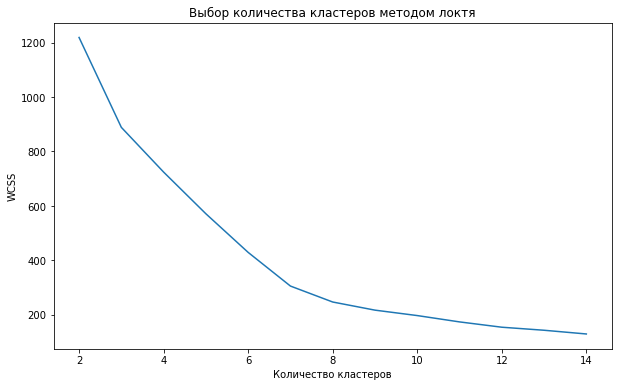

In [ ]:
#Выбираем количество кластеров методом "локтя" и (для сравнения) методом "силуэта"

# импортируем нужный класс для к_средних и оценок силуэта
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# создадим пустой список для записи показателя WCSS  - суммы квадратов внутрикластерных расстояний
wcss = []
# второй пустой список для оценки количества кластеров методом силуэта
silhouette = []


for i in range(2, 15):

    # настроим параметры модели (центроиды максимально далекто др. от друга)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    # обучение и прогноз в одной строке
    preds = kmeans.fit_predict(X_scaled)

    # для каждого к-ва кластеров рассчитаем ошибку и поместим в список
    wcss.append(kmeans.inertia_)

    #для каждого к-ва кластеров считаем коэфф. силуэта
    score = silhouette_score(X_scaled, preds)
    print("Для количества кластеров =", i," средний коэффициент силуэта :",score )

    # складываем коэффициенты силуэта в список
    silhouette.append(score)

klaster_number =np.array(silhouette).argmax()+2

if klaster_number == 2: #два кластера нам недостаточно по условию задачи, даже если модель считает что два - ОК))
    silhouette.pop(0) #если модель настаивает на двух кластерах, удаляем первый элемент списка и повторно ищем максимум в этом усеченном списке
    klaster_number =np.array(silhouette).argmax()+3 #кво кластеров в усеченном списке будет зависеть от номера позиии  - номер позиии начиная с 0 плюс три, потому что два мы уже удалили

print('максимальный силуэт: ',klaster_number,'кластеров' )


# зададим размер графика для метода локтя
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(2, 15), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

Мы поняли что оптимальное количество кластеров - 9. Оба критерия - метод локтя и метод силуэта показали это. Значит, будем делить базу клиентов именно на 9 групп. Чтобы визуально понять логику разделения на группы, рисую график распределения клиентов ДО применения алгоритма, выделяя при этом  товарное направление - я считаю этот признак важным и хочу проконтролировать, что модель учла его правильно.

Text(0, 0.5, 'Дискретная сумма покупок')

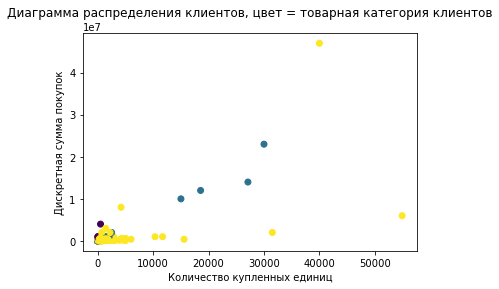

In [ ]:
# На предыдущем этапе поняли сколько нужно кластеров и запускаем алгоритм для этого количества

kmeans = KMeans(n_clusters = klaster_number, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

#Распределение кластеров
y_pred = kmeans.fit_predict(X_scaled)

#Строим диаграмму распределения клиентов (кол-во и сумма покупок) ДО кластеризации и нормализации,
#цвет - товарное направление клиента

plt.scatter(X['количество всех товаров'], X['дискретная сумма'], c= X['товарное число'])
plt.title('Диаграмма распределения клиентов, цвет = товарная категория клиентов', y=1.05)
plt.xlabel('Количество купленных единиц')
plt.ylabel('Дискретная сумма покупок')


Признаков у нас 5 а не 2 и плоская картинка малоинформативна. Рисую трехмерный график ДО применения алгоритма, используя товарное направление, количество купленных товаров, сумму всех покупок.

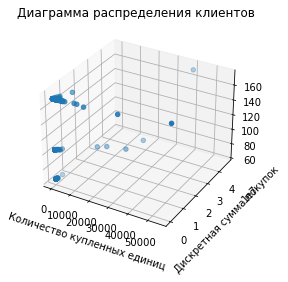

In [ ]:
#3D график до распределения кластеров
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

z = X['товарное число']
x = X['количество всех товаров']
y = X['дискретная сумма']

ax.scatter(x, y, z)
plt.title('Диаграмма распределения клиентов')
plt.xlabel('Количество купленных единиц')
plt.ylabel('Дискретная сумма покупок')
plt.show()



Теперь график отработавшего  алгоритма. Треугольники  - это центры каждого кластера, точки - клиенты, цвет точек определяет принадлежность клиента кластеру.

Сравниваю с графиков ДО алгоритма по товарным направлениям и вижу, что да логика разделения на кластеры учла товарные направления верно - это не значит что в точности товарное направление опеределяет принадлежность к кластеру, но большая часть клиентов с одинаковым товарным направлением оказались в одной группе.

Различия имеются для клиентов с товарным направлением Other, когда мы не смогли определить основной товар, который клиент покупал в максимальном количестве - в этом случае за принадлежность к кластеру начинают отвечать другие показатели - общая сумма выручки и прочее.

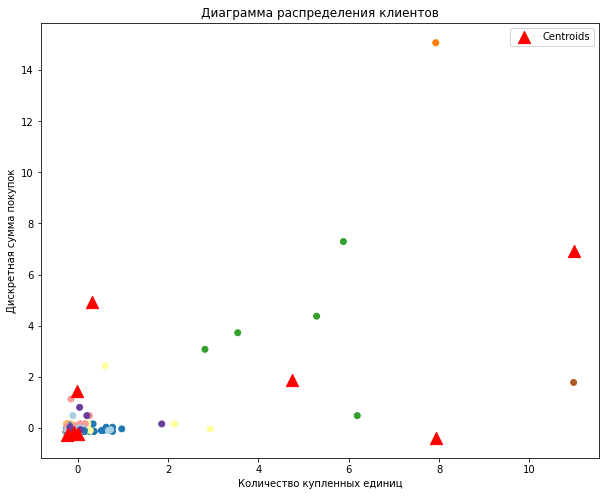

In [ ]:
# результат алгоритма кластеризации k_means
plt.figure(figsize = (10,8))

# строим точечную диаграмму рассеяния нормализованных данных, коды точек возьмем из y_pred
plt.scatter(X_scaled[:,0], X_scaled[:,2], c = y_pred, cmap='Paired')

# выведем центроиды с помощью атрибута cluster_centers_
# для них зададим размер s = 150, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')

plt.title('Диаграмма распределения клиентов')
plt.xlabel('Количество купленных единиц')
plt.ylabel('Дискретная сумма покупок')
plt.legend(loc = 'upper right')

Список клиентов с номером кластеров готов. Теперь нужно показать его отделу маркетинга и спросить - видите вы общие черты у клиентов в одном кластере? Понимаете почему они там оказались? Есть стратегия работы с ними? Достаточно признаков мы использовали?

Не обязательно с первого прогона алгоритма удастся получить реально полезное разделение на группы, с которыми понятно что делать - что им предлагать, как выстраивать общение.

В нашем случае четко выявлены группы крупных клиентов с определенным товарным направлением и много мелких -  точки в левом нижнем углу последнего графика.

Если мы не понимаем что делать с мелкими, можно для них сделать другую сегментацию - когортный анализ  - сгруппировать по времени прихода к нам за первой покупкой или RFM анализ  - делим клиентов по трем признакам - время последней покупки, частота покупок, сумма покупок.

Но это уже другая история))

In [ ]:
#метод к средних дает нам распределение клиентов по кластерам,добавим стобец с кластерами к исходному датафрейму

data_file.insert(1, "кластер",y_pred)
data_file


,наименование клиента,кластер,количество всех товаров,количество заказов,сумма всех покупок,товарное направление,регион по индексу,дискретная сумма,товарное число,регион число
0,ООО «Клиника «Эхинацея»,4,10,1,13423,Token,Москва,10000,105,133
1,Акционерное общество «Пи Джи групп»,7,10,1,12600,Other,Москва,10000,172,133
2,"АНО ""НАЦИОНАЛЬНОЕ ФИТНЕС СОЕДИНЕНИЕ""",3,2,1,21600,Reader,Регион не определен,20000,65,34
3,АНО «ДЮСШ «Нагорная»,7,5000,1,220000,Other,Москва,200000,172,133
4,"АО ""ВЕЛЕДНИКОВО""",1,50,1,9867,Other,Московская область,10000,172,34
...,...,...,...,...,...,...,...,...,...,...
337,"ООО ""Компания Луис+""",6,2221,13,2791863,Other,Москва,2000000,172,133
338,"ООО ""ТД ТИНКО""",6,575,13,171311,Other,Москва,100000,172,133
339,ИП Маринич Юрий Викторович,2,18560,14,12556000,Token,Московская область,12000000,105,34
340,"ООО ""Эликс Базис""",8,54930,17,6741270,Other,Москва,6000000,172,133
